<a href="https://colab.research.google.com/github/annefrancine/Action-and-Gesture-Recognition/blob/master/Action_and_Gesture_Recognitation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 1 : Importing libraries


In [1]:
import cv2
import matplotlib.pyplot as plt
cv2.__version__

'4.1.2'


#Phase 2 : Connecting the drive and accessing the files




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pose_path = '/content/drive/My Drive/pose'

In [0]:
imagens_path = '/content/drive/My Drive/imagens'

# Phase 3 : Accessing pre-trained neural network 

In [0]:
arquivo_proto = '/content/drive/My Drive/pose/body/mpi/pose_deploy_linevec_faster_4_stages.prototxt'
arquivo_pesos = '/content/drive/My Drive/pose/body/mpi/pose_iter_160000.caffemodel'


# Phase 4: Loading an image of the drive

In [0]:
imagem = cv2.imread('/content/drive/My Drive/imagens/body/multiple/multiple_1.jpeg')

In [7]:
imagem.shape

(640, 640, 3)

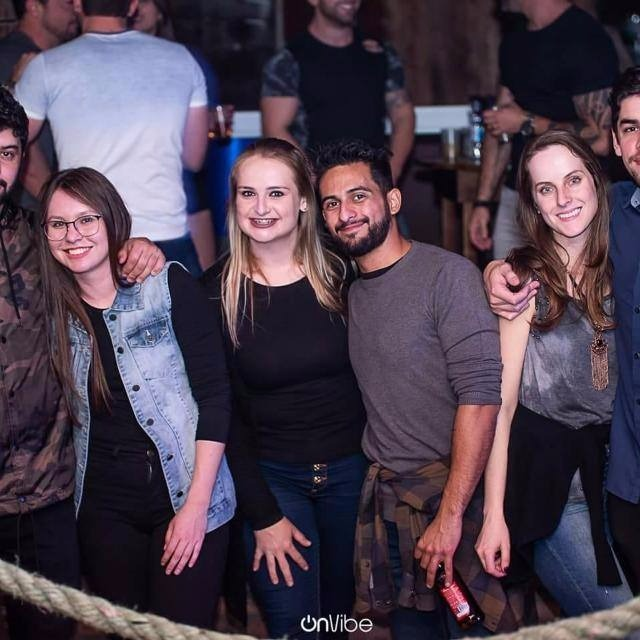

In [8]:
from google.colab.patches import cv2_imshow
cv2_imshow(imagem)

In [0]:
imagem_largura = imagem.shape[1]
imagem_altura = imagem.shape[0]

In [10]:
imagem_largura, imagem_altura

(640, 640)

# Phase 5 : Read the model loaded in Step 3

In [0]:
modelo = cv2.dnn.readNetFromCaffe(arquivo_proto, arquivo_pesos)

# Phase 6 : Define the dimensions of the input image

In [0]:
altura_entrada = 368
largura_entrada = int((altura_entrada / imagem_altura) * imagem_largura)

In [15]:
largura_entrada

368

# Phase 7: Convert the image from openCV  to Caffe blob format


In [0]:
blob_entrada = cv2.dnn.blobFromImage(image = imagem, scalefactor = 1.0 / 255,
                                     size = (largura_entrada, altura_entrada),
                                     mean = (0, 0, 0), swapRB = False, crop = False)

# Phase 8: Output 

In [0]:
modelo.setInput(blob_entrada)
saida = modelo.forward()

In [18]:
saida.shape

(1, 44, 46, 46)

In [19]:
saida[0].shape

(44, 46, 46)

In [20]:
saida[0][0]

array([[0.00049211, 0.00054041, 0.00080381, ..., 0.0004188 , 0.00048497,
        0.00056236],
       [0.00053339, 0.00058671, 0.00055662, ..., 0.00045707, 0.00048965,
        0.00057936],
       [0.00051214, 0.00057876, 0.00055863, ..., 0.00052235, 0.00050592,
        0.00054233],
       ...,
       [0.00052932, 0.00052271, 0.00055545, ..., 0.00058366, 0.00061254,
        0.00079496],
       [0.0005545 , 0.00055392, 0.00056722, ..., 0.00065917, 0.00077181,
        0.00096974],
       [0.00058384, 0.00059912, 0.00055851, ..., 0.00086402, 0.00097046,
        0.0009022 ]], dtype=float32)

In [0]:
ponto = 15
mapa_confianca = saida[0, ponto, :, :]
mapa_confianca = cv2.resize(mapa_confianca, (imagem_largura, imagem_altura))

(-0.5, 639.5, 639.5, -0.5)

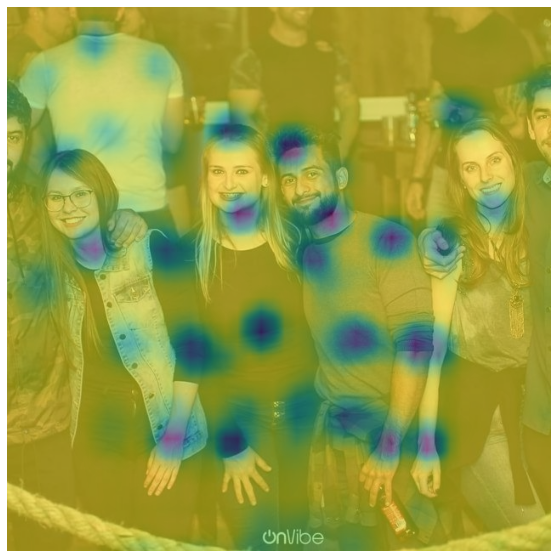

In [22]:
plt.figure(figsize = [14, 10])
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.imshow(mapa_confianca, alpha = 0.6)
plt.axis("off")

(-0.5, 639.5, 639.5, -0.5)

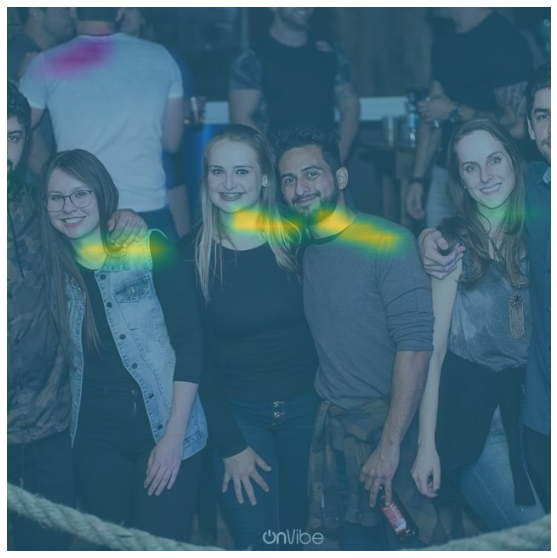

In [23]:
ponto = 24
mapa_confianca = saida[0, ponto, :, :]
mapa_confianca = cv2.resize(mapa_confianca, (imagem_largura, imagem_altura))
plt.figure(figsize = [14, 10])
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.imshow(mapa_confianca, alpha = 0.6)
plt.axis("off")